In [1]:
import collections
import datetime
import itertools
import json
import time

#import ijson
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import tqdm

In [52]:
LANGUAGES = {
    "python": "Python",
    "r": "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
    "c#": "C#",
}

## Heaps's Law

Processing python
	 Opening resources...
Fitted k: 1.0905015321874433e-10
Fitted alpha: 1.7046653691354525
R² value: 0.9959582578120684
Processing r
	 Opening resources...
Fitted k: 7.304505391916182e-11
Fitted alpha: 1.637711894724874
R² value: 0.9959582578120684
Processing javascript
	 Opening resources...
Fitted k: 8.569604051119784e-14
Fitted alpha: 2.015244068670759
R² value: 0.9959582578120684
Processing java
	 Opening resources...
Fitted k: 1.7566061425579845e-07
Fitted alpha: 1.2255300690088895
R² value: 0.9959582578120684
Processing cpp
	 Opening resources...
Fitted k: 6.829210791493114e-08
Fitted alpha: 1.3659843341742703
R² value: 0.9959582578120684
Processing php
	 Opening resources...
Fitted k: 2.2530597613683806e-05
Fitted alpha: 1.04993092945789
R² value: 0.9959582578120684
Processing ruby
	 Opening resources...
Fitted k: 0.00023589395195785126
Fitted alpha: 0.8497107349171863
R² value: 0.9959582578120684
Processing perl
	 Opening resources...
Fitted k: 0.000897014080839

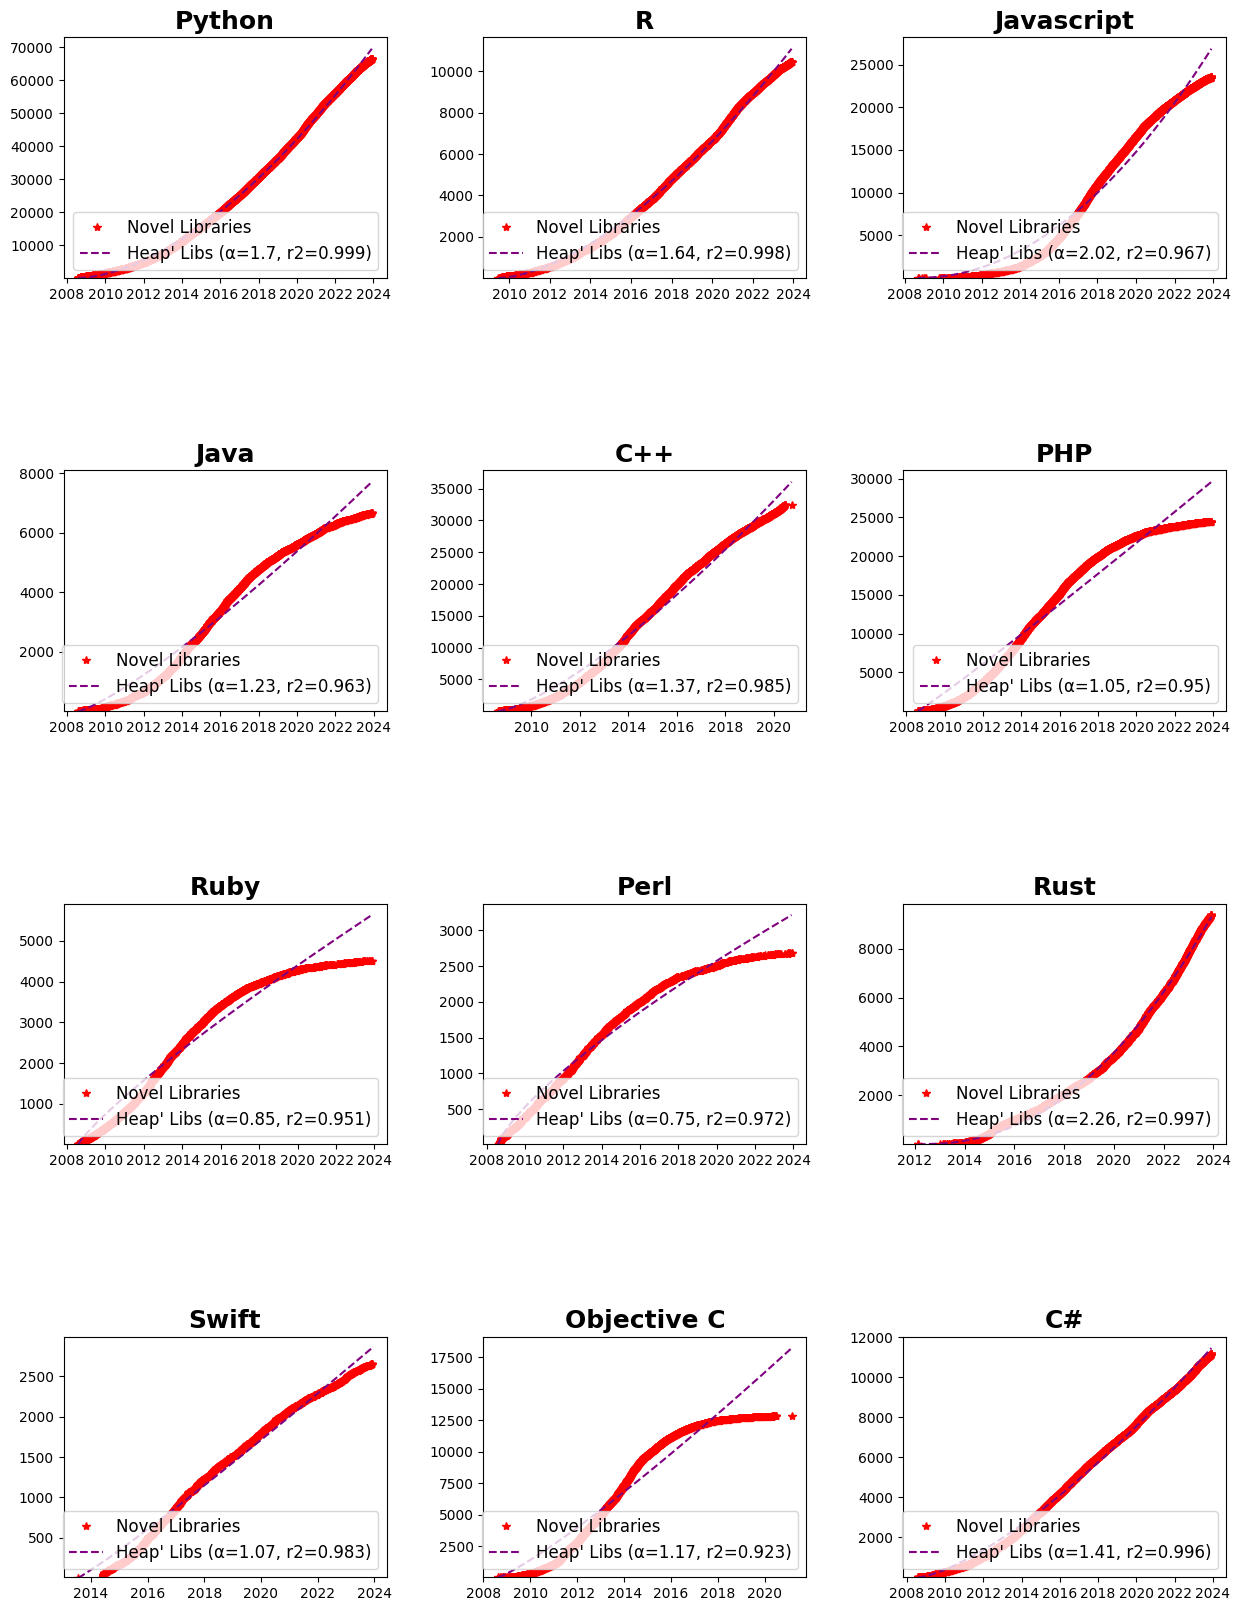

In [62]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import ScalarFormatter, LogFormatterExponent,LogFormatterMathtext
from scipy.optimize import curve_fit


import time
from sklearn.linear_model import LinearRegression


%matplotlib inline

lib_alphas = {}
lib_r2 = {}

square_size = 5
rows, columns = (len(LANGUAGES) + 2) // 3, 3
fig = plt.figure(figsize=(square_size * columns, square_size * rows))
gs = GridSpec(rows, columns, figure=fig)
plt.subplots_adjust(hspace=0.8, wspace=0.3)

for index, language in enumerate(LANGUAGES):
    print(f"Processing {language}")
    path_to_lib = f"data/results/{language}"

    i, j = index // columns, index % columns
    ax = fig.add_subplot(gs[i, j])
    
    print("\t Opening resources...")
    with open(f"{path_to_lib}/{language}_libs_first_dates.json") as handle:
        libs_to_dates = json.load(handle)
    with open(f"{path_to_lib}/{language}_pairs_first_dates.json") as handle:
        pairs_to_dates = json.load(handle)

    libs_dates = [item["date"] for item in libs_to_dates.values()]
    sorted_libs_dates = sorted(libs_dates)
    libs_counts = collections.Counter(libs_dates)
    
    libs_xs = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in sorted(libs_counts.keys())]

    # monthly_binned_libs_counts = collections.defaultdict(int)
    # for item in sorted_libs_dates:
    #     monthly_binned_libs_counts["-".join(item.split("-")[:2])] += 1
    
    # ax.bar(
    #     sorted(monthly_binned_libs_counts.keys()),
    #     [monthly_binned_libs_counts[item] for item in sorted(monthly_binned_libs_counts.keys())])
    # ax.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
    # ax.set_xticklabels(sorted(monthly_binned_libs_counts.keys()), rotation=90, fontsize=4)
    # continue
    
    libs_ys = list(itertools.accumulate([libs_counts[date] for date in sorted(libs_counts.keys())]))
    
    pairs_dates = [item["date"] for item in pairs_to_dates.values()]
    sorted_pairs_dates = sorted(pairs_dates)
    pairs_counts = collections.Counter(pairs_dates)
    
    pairs_xs = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in sorted_pairs_dates]
    pairs_ys = list(itertools.accumulate([pairs_counts[date] for date in sorted_pairs_dates]))


    ###########################


    # xs = [item.timestamp() - libs_xs[0].timestamp() + 1 for item in libs_xs]
    # xs_transformed = np.log(xs).reshape(-1 ,1 )
    # counts_transformed = np.log(np.array(xs) + 1)
    
    # model = LinearRegression()
    # model.fit(xs_transformed, counts_transformed)
    
    # alpha_libs = model.coef_[0]
    # log_c_libs = model.intercept_
    # c_libs = np.exp(log_c_libs)
    # r2_libs = model.score(xs_transformed, counts_transformed)
    # print(f"\tLibs Fit performed; alpha={alpha_libs} c={c_libs} r2_libs={r2_libs}")
    
    # lib_alphas[language] = alpha_libs
    # lib_r2[language] = r2_libs


    xs = np.array([dt.timestamp() - libs_xs[0].timestamp() + 1 for dt in libs_xs])
    
    # Define Heaps' Law function: V(N) = k * N^beta
    def heaps_law(N, k, beta):
        return k * N ** beta
    
    # Fit Heaps' Law to the data (xs, libs_ys)
    popt, pcov = curve_fit(heaps_law, xs, libs_ys, maxfev=10000, p0=[1.0, 0.5])
    
    # Extract the fitted parameters
    k, beta = popt
    
    # Compute the predicted values using the fitted Heaps' Law model
    predicted_ys = heaps_law(xs, *popt)
    
    # Compute the R² value to evaluate the fit
    ss_res = np.sum((libs_ys - predicted_ys) ** 2)  # Residual sum of squares
    ss_tot = np.sum((libs_ys - np.mean(libs_ys)) ** 2)  # Total sum of squares
    r_2 = 1 - (ss_res / ss_tot)
    
    # Print fitted parameters and R² value
    print(f"Fitted k: {k}")
    print(f"Fitted alpha: {beta}")
    print(f"R² value: {r_squared}")
    ###
    
    #ax.semilogy(libs_xs, libs_ys, label="Novel Libraries")
    #ax.semilogy(pairs_xs, pairs_ys, label="Novel Pair")
    #ax.plot(libs_xs, libs_ys, "*",label="Novel Libraries")
    ax.plot(libs_xs, libs_ys, "r*",label="Novel Libraries")

    #ax.plot(pairs_xs, pairs_ys,"^", label="Novel Pair")
    ax.plot(libs_xs, predicted_ys, "--", color="purple", label=f"Heap' Libs (α={round(beta, 2)}, r2={round(r_2, 3)})")

    
    ax.legend(fontsize=12, loc="lower right")
    ax.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
    #ax.set_xscale('log')
    #ax.xaxis.set_major_formatter(LogFormatterMathtext(base=10))
     #ax.set_yscale('log')
    #ax.yaxis.set_major_formatter(LogFormatterMathtext(base=10))
    ax.set_ylim(bottom=10)
plt.show()   
#plt.savefig("heaps_time.png")